# Outline

- End to End pipeline
- ML operations
- Typical ML workflow
    - challenges in manual hand offs
    - example workflow, and how to automate many of the tasks in the workflow
- orchastration / automation
- end to end trsability of the pipeline
    - model lineage and artifacts tracking

- SageMaker pipelines
- SageMaker Model registry to track the trained models
- start model with automation -> briefly evolve the pipelines

- continus integration, continous deployement

# Machine Learning Operations (MLOps) Overview

- ML life cyles is not same as Software Development life cycle
    - ML life cycle is difficult to plan in a project perspective
    - Longer time to experiement
    - Data preperation tasks
    - more inputs for versioning?
    - additional pipeline tasks
    
- A model is a small part of the overall solution
    - more components are need to be integrated with
        - some activites may be creating a rest apis
        - building application that can responds to the prediction
        
- Multi personal skills
    - A data scientiest may not have his skills in the it domain
    - Need a deployment engineer to deploy the model
    - if you need to integrate the model with a you may need a software engineer to do that
    - integration with traditional IT practices
        - change management: a requirement like when a new model is ready it should go into production
    
## ML model path to production
- Data Engineer create data then hand it over to the data scientiest
- Data Scientiest iterate through the data and produce a model that satisfies the performance metrics
- Model Deployment Engineer will come to play now
- Now a software engineer need to make it integrate with an existing solution
- Now a DevOps/ SysOps Engineer to operates that model in production
        
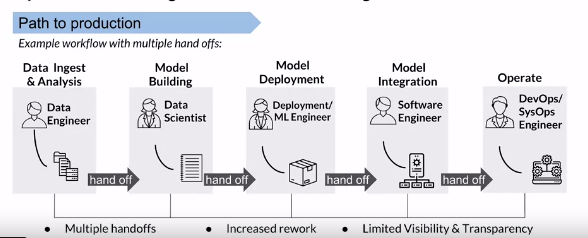

- often the disconnects b/w the teams will make this process slow
- look at how automation and integration can seedup this process

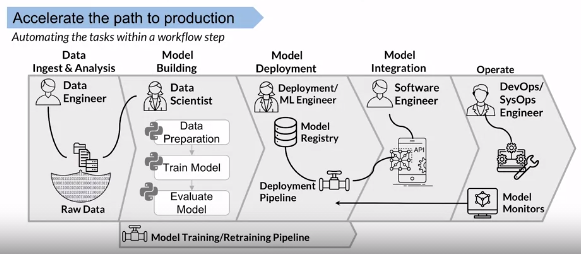

- model registry
    - co-ordinates b/w data scientiest and the deployment engineer
    - model is no more a black box
    - dev ops engineer can access model drift and other parameters
    
- transperancy accross persona

- automation/orchastraction


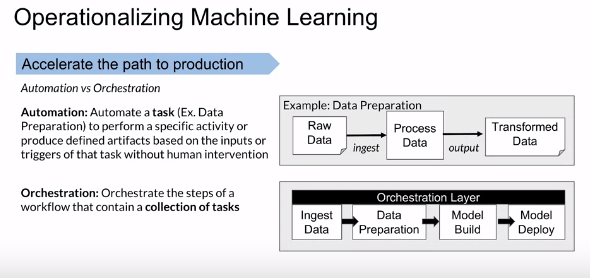

- orchastration
    - can define quality gates; when the pipeline should flow to the next step of the pipeline
    
    
- model deployment you can use an A/B testing
    - which one is performing 
    - if the model 2 is perfoming better than the model 1 with some margin, then you can deploy model 2 insted of model 1
    

    

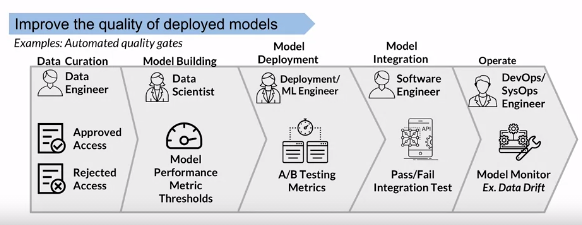

# Creating Machine Learning Pipelines

## Topics
- creating machine learning pipelines
- quality gates (including in the pipeline)

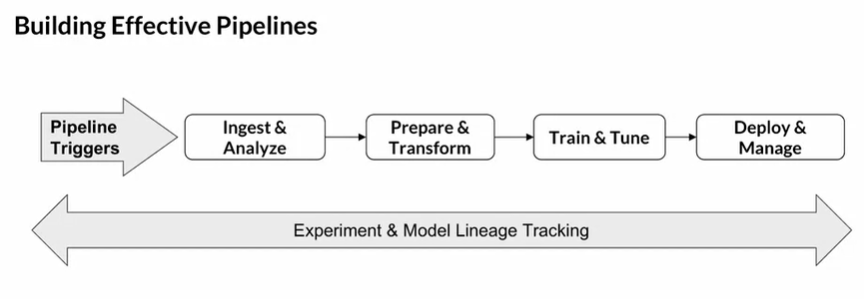

- pipeline triggers
    - in software develpment lifecycle, when you have a commit to the repository, you may have to trigger for the new version
    - however, in the machine learning pipeline you may have diff triggers
        - changed to algoritham hyperparameters
        - having a new training data

- another key goal in building a pipeline is for traceability
    - how pipeline artifacts are build

## Data Tasks
- Data Ingestion for model development
    - data scientiest reach out to data engineer for data
    - get approvals (security)
    - get the data for model building
    
- cons for this process
    - slow down the process
    - the manual hand offs will reduce the tracability of the data
    - if the model needs retraining then it is a problem (need to get new data)
    
- Recommendations
    - data lake access (governed) to data scientiest for his activities
    
- Step 2 (Data preprocessing and feature engineering)
    - python scripts / other model that transforms the data into features used by the model
    - when automated
        - raw data -> feature generation -> features
        - the features generations includes splitting of data into
            - train
            - test
            - validation


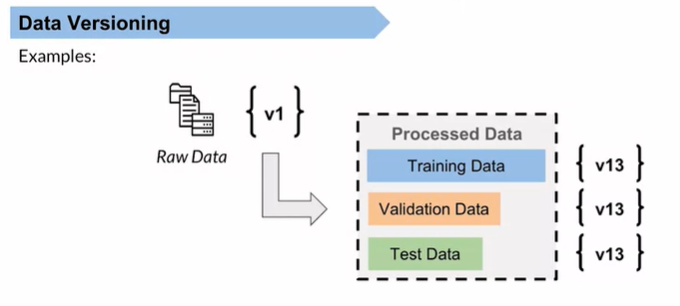

- trceability is the product of versioning

- like code versioning, you have data versioning
    - like in the figure we have the input data as version 1
    - while the training, valiation, and the test data of verion 13 as we have multiple iterations
    
- can include a number of quality checks in the data pipelines
    - data quality (large no of missing values)
    - statistical bias
    - data schema
- not only performing this task but also automating them as part of the machine learning pipelines

## Model Building Task

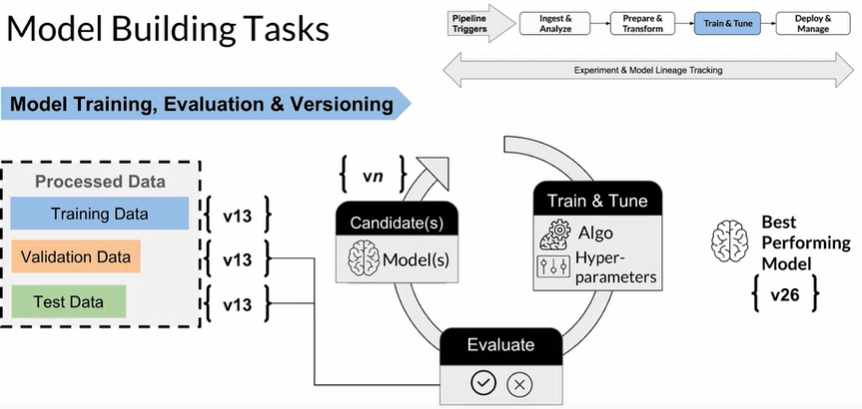

- iterating with the features and find the best performing model based on the evaluation metrics you have chose.

## Model Deployment Task

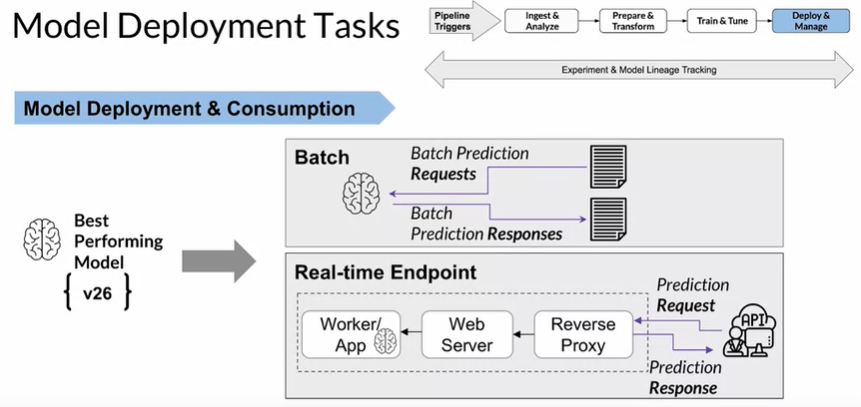

- batch mode
- realtime perediction 
    - serving stack (includes)
    - proxy
    - web server
    

## Operating Tasks

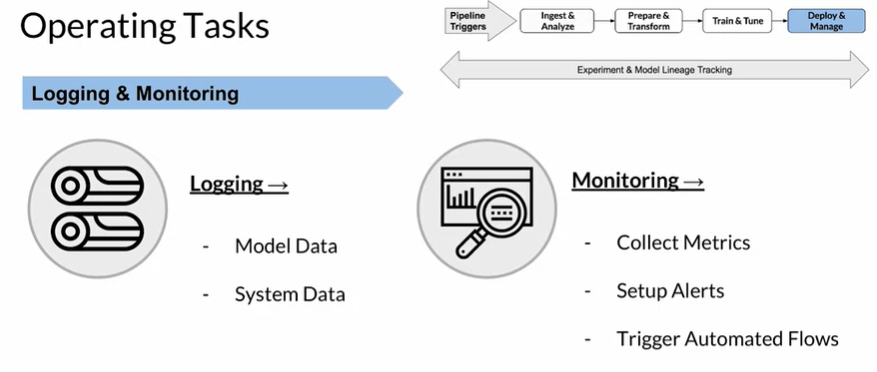

- models for consumption


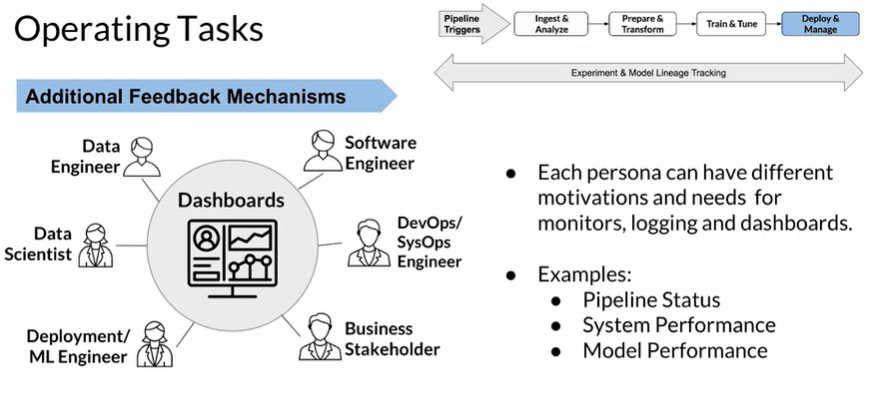

## pipeline orchestration
- steps within <b>task</b> can be automated
- each set of tasks has <b>inputs & artifacts</b> produced as part of those steps
- <b>orchastration</b> is required to coordinate the execution of tasks and steps within the tasks

# Model Lieage & Artifacts Tracking

## Model Lineage

- what inputs and artifacts used to create the model
    - verson of the input data
    - version of the code
    - version of the hyper parametrss
    
    - version of the algoritham
    - frameworks that have been used
    - version of the docker images that have been used
    - version of the packages and the libraries that have been used
 
 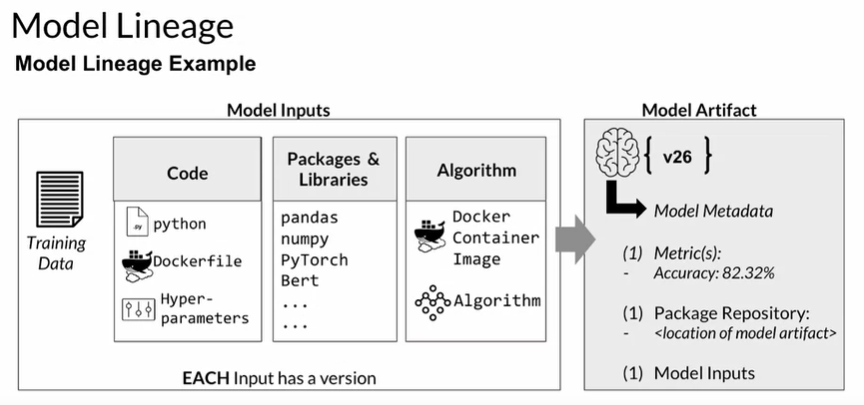

- hash code of your commit

- <b>Where to store all this information?</b>
- model resgistry
    - central repository to store model metadata and model artifacts
    - track which models are deployed across environments
    
- when you include a model registry into your pipeline, it will bring you tracability and auditability
- how each of the model version is built

-<b>What is an Artifacts</b>
- is the output of a step or a task in the pipeline that can be consumed by the next step in the pipeline or deployed directly for consumption

## Example machine learning task



- why artifacts tracking is important?
    - consider the above example tasks has been automated and orchastrated into your machine learnig pipeline
    - eash task has an artifacts consumed by next task and each artifact has a different version associated with it
    
    - if you need to debug something this information is important
    - Reliability of the workflow; if a human deleted the endpoint, you need to how the endpoint is built to recover that endpoint

# <u>Machine Learnign Pipelines with Amazon SageMaker Pipelines</u>
# Machine Learning Pipelines with Amazon SageMaker Pipelines

- tool: - SageMaker Pipelines
- python SDK (software development toolkit | SDK)
- can automate workflows
- visualize the workflow in SageMaker Studio
- can integrate with SageMaker model registry
    - Hence, can capture some of the information
        - location of the model
        - model evaluation metircs
-  SageMaker projects allow to extend your pipelines and incoporate CI/CD components

- SageMaker Pipelins has 3 components
    - pipelines; allow to automate model building workflows. the worksflows can be visualized in the sagemaker studio
    
    - SageMaker Model Registry; which store the information  of metadata and has the caipability of automatic model depoyment approval workflow
    
    - Projects; has built in templates
        - CI/CD practices into
            - model building pipeline
            - model deployment pipelines

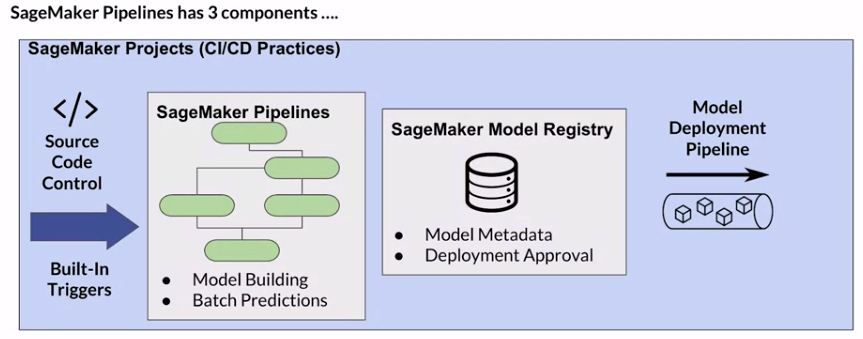

- The focus is on
    - SageMaker pipelines
    - model registry

- The first stage of the workflow is data processin
    - the SageMaker pipeline has processing Job for this
    
 
 
- input: - the raw data
     - in this use case the review text
- the sagemaker processing step expect the <b>script to be in a s3 drive</b>
    - here the script is the Scikitlearn processing script that process the data and split the data into train test and the validation
    
 ### How did you configure the pipeline

In [ ]:
# first input will be the processing inputs

processing_inputs = [
    processinInput(
        input_name = 'customer_review_input_data',
        source = 's3://...',
        destination = 'opt/ml/processing/input/data',
        x3_data_distribution_type='SharedByS3Key'
    )
]

processing_outputs=[
    processingOutput()
]

# once you congigured your input and output
# now you need to configure the processing step

processing_step = ProcessingStep(
    name='Processing',
    code='src/prepare_data.py', #lcoation of the script
    processor=processor, # The sklearn processor (weeek 1 discussed this)
    inputs=processing_inputs, # defined above
    outputs=processing_outputs,
    job_arguments=[
        '--train-split-percentage',
        str(train_split_percentage.default_value,)
        ...
    ]
)

# now the output of the processin job will fed into the training job
# see the figure below



- the input from the data processing will be the input for training
- the validation data will be used to evaluate the model and the result will be stored as a model artifact in s3
- we can configure the hyperparameters for the step
    - for a particular model

In [ ]:
hypterparameter={
    'max_seq_length': max_sequence_length,
    'epochs': epochs,
    'learning_rate': learning_rate
    ...
}

## to setup the process in the pipeline

In [ ]:
from sagemaker.pytorch import PyTorch as PyTorchEstimator

estimator = PyTorchEstimator(
    entry_point = 'train.py',
    souce_dir='src',
    role=role,
    instance_count=train_instance_count,
    instance_type=train_instance_type,
    volume_size=train_volume_size,
    py_version='py3',
    framework_verion='1.6.0',
    hyperparameters=hyperparameters,
    metric_definitions=metric_definitions,
    input_mode=input_mode # ?
)

# now we have to use the pipeline step
training_step = TrainingStep(
    name='Train',
    estimator=estimator,
    inputs={
        'train': TrainingInput( #output from the processing job
            s3_data=processin_step.properties.ProcessingOutputConfig.Outputs[
                'sentiment-train'
            ].S3Output.S3Uri,
            content_type='text/csv'
        ),
        'validation':TrainingInput(...)
    }
)

### Training Step
- the input is the output location where you want to store your artifacts

## Model Evaluation
- again using sagemaker processing job
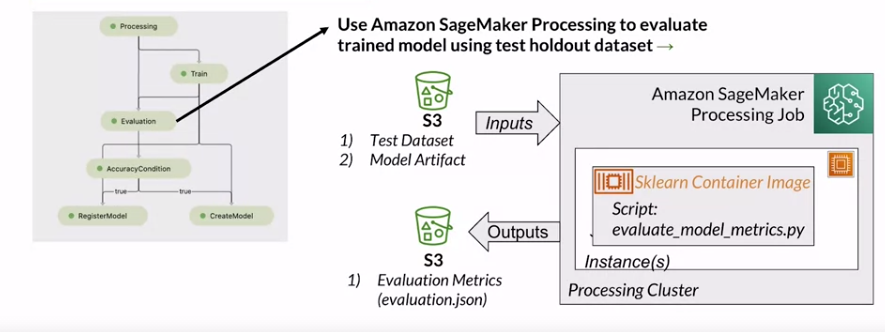

- inputs
    - the hold-out test dataset
        - generated during the preprocessing step
    - the trained model
    - the python script to evaluate the model
    
- the evaluation job
    - load the model
    - run the model on the test data on batch mode
    - output the evaluation metrics to the specified output s3 location

## Model evaluaton step

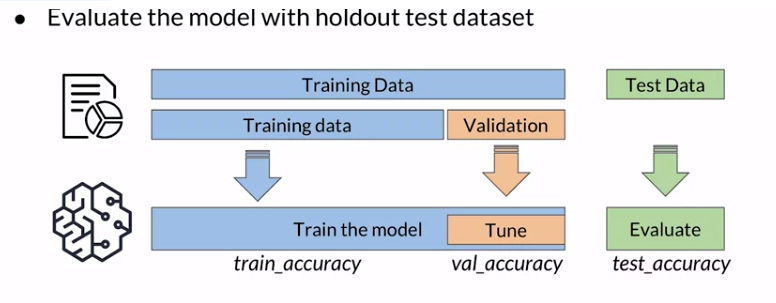

## Model evaluation code

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def predict_fn(input_data, model): # need to define a model predict function
    model.eval()
    ...
    
    return predicted_class_jsonlines

...

y_test = df_test_reviews['review_body'].map(predict) # predict function on holdout data to product the model metirc
y_actual = df_test_review['sentiment'].astype('int64')

print(
    classification_report(y_true=ytest, y_pred=y_actual)
)

accuracy = accuracy_score(y_true=y_test, y_pred=y_actual) # calculate the accuracy for the text classifer
print('Test accuracy: ', accuracy)

- the model evaluation script will be provided as input to the evaluation pipeline


- once the accuracy evaluation pipe is completed we can anayze the scores as shown below 

- the evaluation pipe will write the evaluation metric in the specifed s3 on a file called <b>evaluation.josn</b>

- the output can be used to find should the model deployed (accuracy >= threshold)



In [ ]:
from pprint import pprint

evaluation_json = sagemaker.s3.S3Downloader.read_file(
    '{}/evaluation.json'.format(evaluation_metric_s3_uri)
)

pprint(json.loads(evaluation_json))

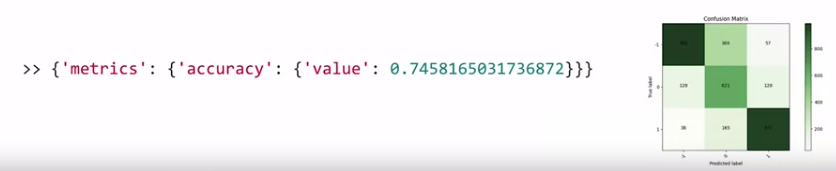
- the output will be something similar to this

## How to include the step in the pipeline?

In [ ]:
from sagemaker.workflow.properties import PropertyFile

evaluation_report = PropertyFile(
    name='EvaluationReport',
    output_name='metics',
    path='evaluation.json'
)

- here we have to configure a property file
    - a property file hold information about a processing job

- then the property file will be evaluated in a conditional clause to determine whether the model should be deployed or not

### need to defind the pipeline step again
- code below

In [ ]:
evaluation_step = ProcessingStep(
    name='EvaluateModel',
    processor=evaluation_processsor,
    code='src/evaluation_model_metic.py',
    inputs=[
        ProcessingInput(...),
        ...
    ],
    output=[
        ProcessingOutput(...),
        ...
    ],
    job_arguments=[...],
    property_files=[evaluation_report],
)

- the condition metric use the property file 
    - here the accuracy is mached against a threshold 
    - see the figure
    
    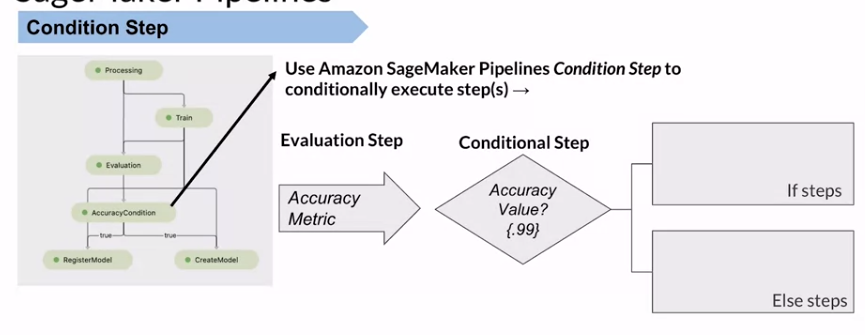

### How condition step is configured?

In [ ]:
min_accuracy_value = ParameterFloat(
    name='MinAccuracyValue',
    default_value=0.01
) # establish a minimum accuracy value

from sagemaker.workflow.conditions import ConditionGraterThanOrEqualTo
from sagemaker.workflow.condition_step import (
    ConditionStep,
    JsomGet
)

# to create the condition step
minimum_accuracy_condition = ConditionGraterThanOrEqualTo(
    left=JsonGet(
        step=evaluation_step,
        property_file=evaluation_report,
        json_path='metrics.accuracy.value',
    ),
    right=minmum_accuracy_value # accuracy
)

# configure the condition step
minimum_accuracy_condition_step = ConditionStep(
    name='AccuracyCondition',
    conditions=[minimum_accuracy_condition],
    # success, continue with the model registration
    if_step=[registration_step, create_step],
    else_step[], # fail, end the pipeline
)

## Registering the model & package the model for deployment

### SageMaker Registry

- model catelog for model metadata
- approval status of the model
- can use as a trigger for model deployment pipeline
    - when you approve a model, the trigger will initiate the model deployemnt pipeline
    
### How to Register the model?

In [ ]:
# deploy the image for inference
inferance_image_uri = sagemaker.image_uris.retireve(
    framework='pytorch',
    region=region,
    version='1.6.0',
    py_version='py3',
    instence_type=deploy_instance_type,
    image_scope='inference'
)

# define model metrics to be stored as metadata
from sagemaker.model_metircs import MetricSource, ModelMetrics

model_metrics = ModelMetrics(
    model_statistics=MetircsSource(
        s3_uri='s3://...',
        content_type='application/json'
    )
)

# Register the model (Built-in Function)
register_step = RegiesterModel(
    name="RegisterModel",
    estimator=estimator,
    image_uri=...,
    model_data=training_step.properties.ModelArtifacts.S3ModelArtifacts,
    content_types=['application/jsonlines'],
    resource_types=['application/jsonlines'],
    inference_instances=[deploy_instance_type],
    trasform_instances=['ml.m5.xlarge'], # batch trasform
    model_package_group_name=model_package_group_name,
    approval_status=model_approval_status,
    model_metrics=model_metrics
)
# all this data will be used to populate the model registry
# there is an option to add the model approval status
# the default model approval statsus is the set the status as 'pending for manual approval'
# this is inline with the continous delivery strategy vs continous deployment strategy
# a human to approve the model before any downstram process

## How to link all the diff parts in the pipeline

- need to configure the pipeline using the function Pipeline in the SDK

In [ ]:
from sagemaker.workflow.pipeline import Pipeline

pipeline = Pipeline(
    name = pipeline_name,
    paramerters=[
        input_data,
        procesing_instance_count,
        ...
    ],
    steps=[
        processing_step, 
        training_step, 
        evaluation_step,
        minmum_accuracy_condition_step
    ],
    sagemaker_session=sess
)

# now we need to run the pipeline
response = pipeline.create(role_arn=role)

pipeline_arn = response('PipelineArn')

execution = pipeline.start(
    parameters=dict(
        InputData=raw_input_data_s3_uri,
        ProcessingInstanceCount=1,
        ...
    )
)

# Machine Learning Pipeliens with Amazon SageMaker Projects
## <u>Not included in the Lab </u>

- Automation (pipelines)
    - tracing quality gates
    - lineage
    
- include CI/CD practices is an advanced topic
- sagemaker projects gives the CI/CD caipabilites
    - preconfigured templates

### SageMaker Projects
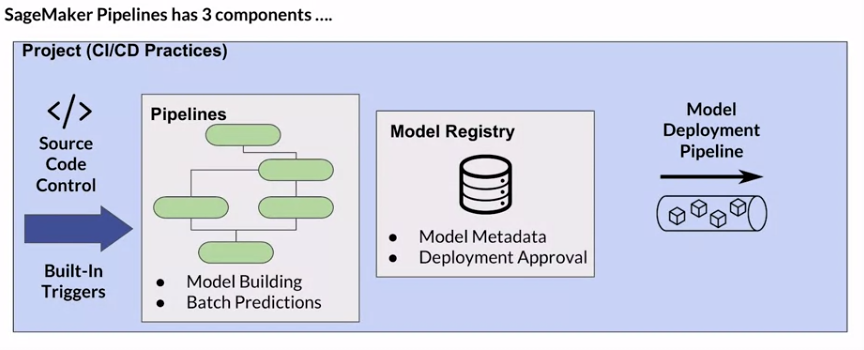

- with projects you can have
    - incorporate source/version control    
    - trigger down stream process like deployment of an approved model    
    - 3 built in MLOps project templates
        - Build, Train, Deploy
        - Build, Train
        - Deploy        
    - Ability to bring custom project templates

# Amazon SageMaker Projects Demo

### click flows
- SageMaker Studio
- go to components and registry (left side bottom)
- projects is selected in the dropdown
- click on <b>create project</b>
    - this will list down the templates, that we have discussed earlier
    - or you can click on the organization template to see the custom templates you have made
    
- for this demo we are selecting the template
    - MLOps templated for model

- Inputs
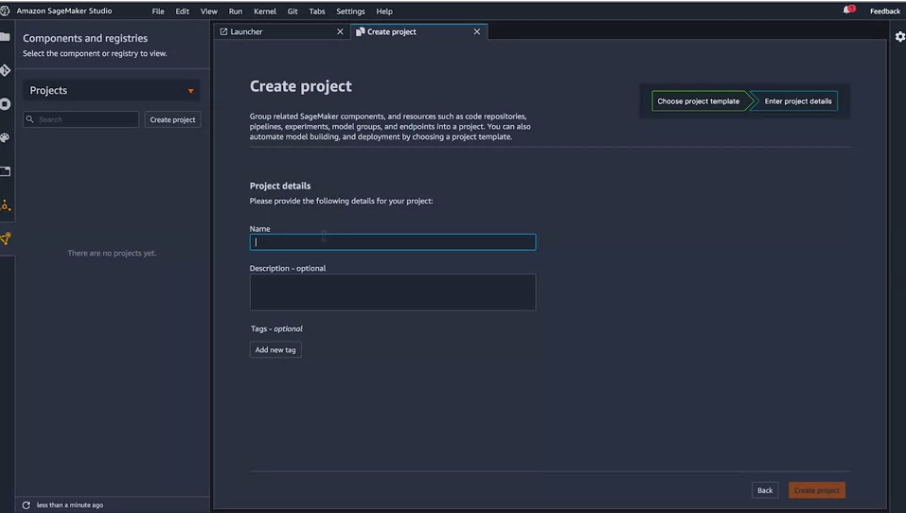

- provide a name
- click on create project 
- will take sometime to create the project

- once the project created, you can see the resources configured for this project

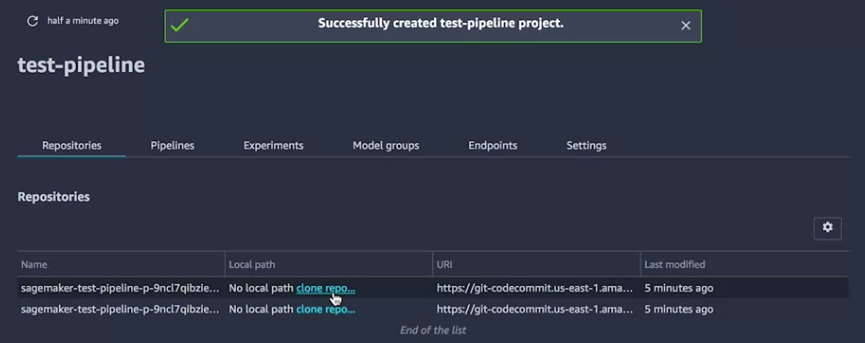

- 2 git templates
    - for model building task and python code for model building pipeline using sagemaker pipeline
    - for model deployment tasks
        - aws cloud formation template for creating sagemaker hosted endpoints

    - by clicking clone repo you can clone the repositories to your AWS SageMaker Studio
    
    - after cloing the repository you can iterate on the cod and commit the code back to the repository

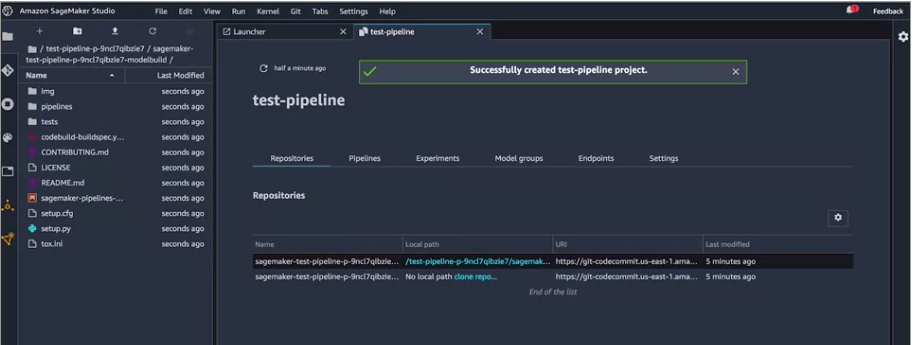

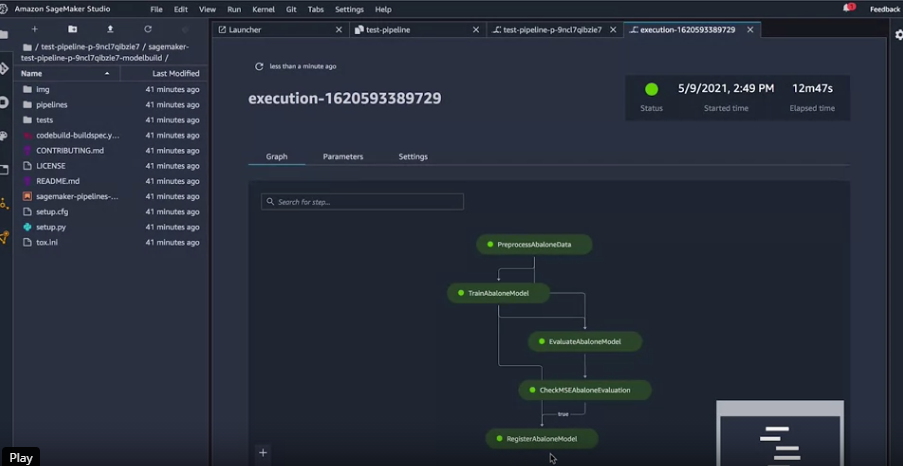

- sagemaker model groups

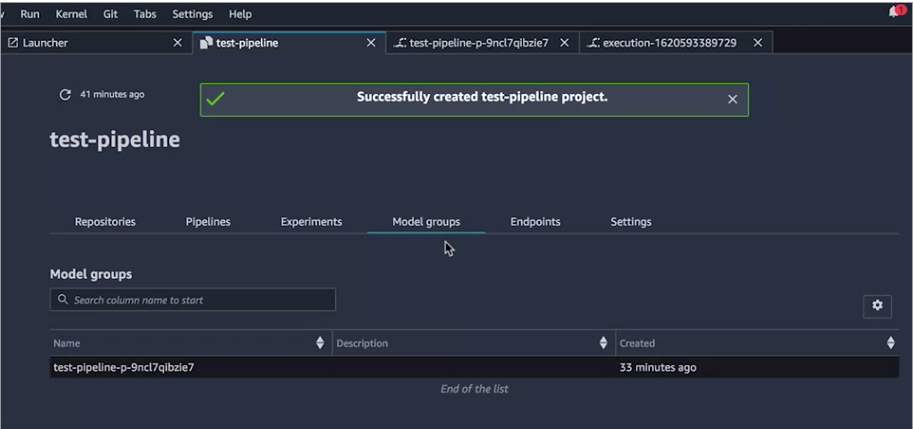

- model package group in the registry
- click on that

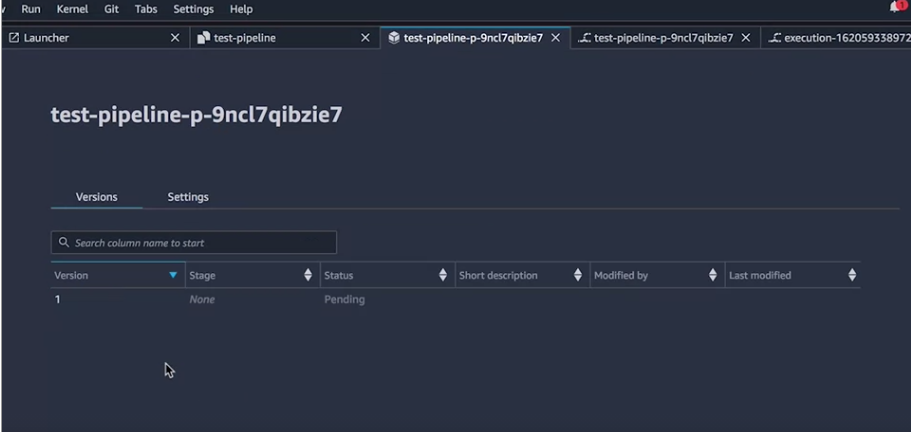

- model version registerd 
- stage to None (the model is deployed)
- click on the model

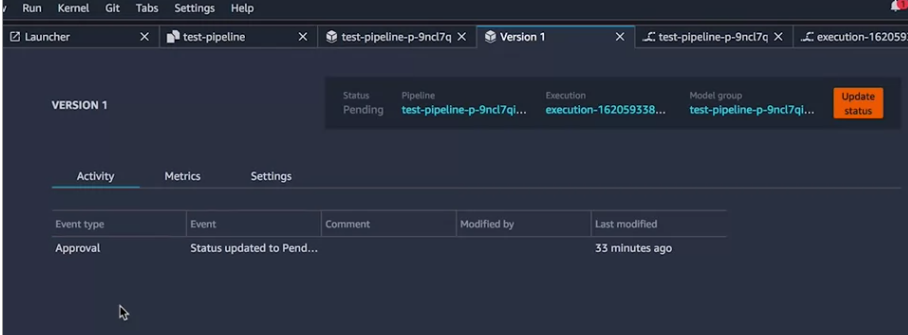
- go to metrics
- if the metics are above the threshold to deploy the model
- approve the model for deployment by clicking the update status


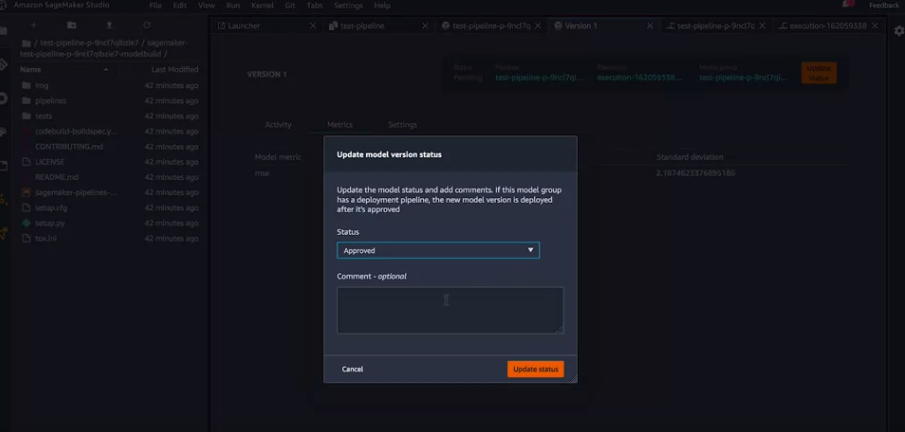

- change the status to approved
- hit the update status

### For more details go to the video

- SageMaker Projects
- https://www.coursera.org/learn/ml-pipelines-bert/lecture/NBxrF/amazon-sagemaker-projects-demo

# Week 3 Referances

- [A Chat with Andrew on MLOps: From Model-centric to Data-centric AI](https://www.youtube.com/watch?v=06-AZXmwHjo)

# <u>Assignment</u>
# SageMaker pipelines to train a BERT-Based text classifier

1. Configure dataset and processing step

2. Configure training step

3. Configure model-evaluation step

4. Configure register model step

5. Create model for deployment step

6. Check accuracy condition step

7. Create and start pipeline

8. List pipeline artifacts

9. Approve and deploy model

# Assignment material
aws s3 cp --recursive s3://dlai-practical-data-science/labs/c2w3-594046/ ./